In [3]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
movie=pd.read_csv('movie_metadata.csv')
movie = movie.dropna(how='any')
print(movie.shape)

(3756, 28)


In [5]:
movie.head(1)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000


In [6]:
pd.isna(movie).sum().sum()

0

In [7]:
movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [8]:
movie.loc[:,'imdb_labels'] = ["bad" if x<2 else "mediocre" if  2<=x< 4 else "average"
                              if  4<=x< 6 else "good" if  6<=x<8 else "excellent" for x in movie['imdb_score']]
mlabel = movie[["director_name", "genres","content_rating",
                "num_user_for_reviews", "imdb_score", "imdb_labels"]]
mlabel.head()

,director_name,genres,content_rating,num_user_for_reviews,imdb_score,imdb_labels
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,PG-13,3054.0,7.9,good
1,Gore Verbinski,Action|Adventure|Fantasy,PG-13,1238.0,7.1,good
2,Sam Mendes,Action|Adventure|Thriller,PG-13,994.0,6.8,good
3,Christopher Nolan,Action|Thriller,PG-13,2701.0,8.5,excellent
5,Andrew Stanton,Action|Adventure|Sci-Fi,PG-13,738.0,6.6,good


In [9]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'imdb_labels'],
      dtype='object')

In [10]:
columns= ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 
        'actor_1_facebook_likes','gross', 'num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster'
        , 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes',
        'aspect_ratio', 'movie_facebook_likes']
x= movie[columns]
y= movie[["imdb_labels"]]

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 11)
cart = DecisionTreeClassifier()
cart.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [12]:
train_pred = cart.predict(xtrain)
print("Accuracy:",metrics.accuracy_score(ytrain, train_pred))
print("confusion_matrix")
print(confusion_matrix(ytrain, train_pred))

Accuracy: 1.0
confusion_matrix
[[ 684    0    0    0    0]
 [   0    2    0    0    0]
 [   0    0  141    0    0]
 [   0    0    0 1751    0]
 [   0    0    0    0   51]]


In [13]:
test_pred = cart.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, test_pred))
print("confusion_matrix")
print(confusion_matrix(ytest, test_pred))

Accuracy: 0.6796805678793256
confusion_matrix
[[130   0   1 135  10]
 [  1   0   0   0   0]
 [  1   0  50  20   0]
 [126   2  26 583  11]
 [ 13   1   0  14   3]]


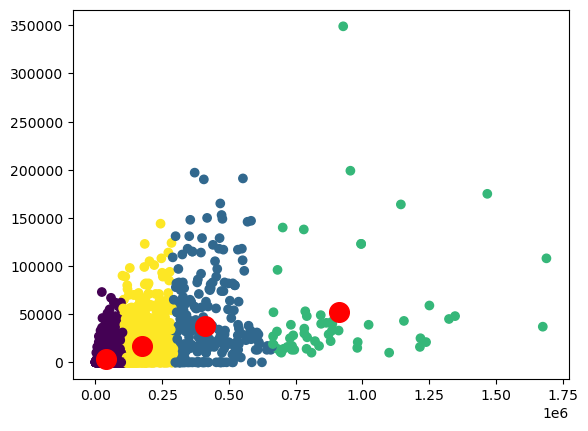

In [14]:
from sklearn.cluster import KMeans
x=movie[['num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes']]
kmeans = KMeans(n_clusters= 4, n_init = 'auto').fit(x)
y_pred=kmeans.predict(x)
plt.scatter(x['num_voted_users'], x['movie_facebook_likes'], c=y_pred.astype(float))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=200, c='red')
plt.show()